In [1]:
from scipy.interpolate import UnivariateSpline
import numpy as np

x, y = np.array([1, 2, 3, 4]), np.array([1, np.nan, 3, 4])
w = np.isnan(y)
y[w] = 0.
spl = UnivariateSpline(x, y, k=2) #, w=~w)

In [2]:
spl(np.array([.1*i for i in range(30)]))

array([1.5  , 1.375, 1.26 , 1.155, 1.06 , 0.975, 0.9  , 0.835, 0.78 ,
       0.735, 0.7  , 0.675, 0.66 , 0.655, 0.66 , 0.675, 0.7  , 0.735,
       0.78 , 0.835, 0.9  , 0.975, 1.06 , 1.155, 1.26 , 1.375, 1.5  ,
       1.635, 1.78 , 1.935])

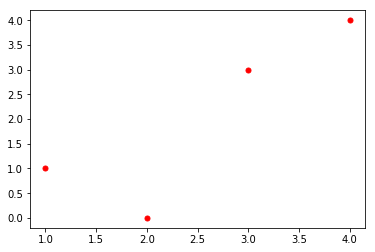

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro', ms=5)
plt.show()

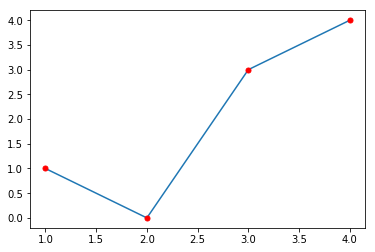

In [12]:
xs = np.linspace(1, 4, 4)
spl = UnivariateSpline(x, y)
plt.plot(xs, spl(xs))
plt.plot(x, y, 'ro', ms=5)
plt.show()

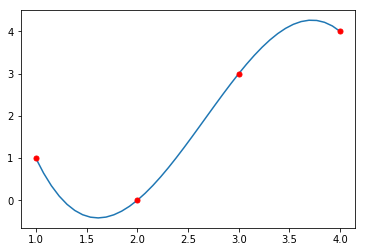

In [14]:
xs = np.linspace(1, 4, 40)
spl = UnivariateSpline(x, y)
spl.get_knots
plt.plot(xs, spl(xs))
plt.plot(x, y, 'ro', ms=5)
plt.show()

In [16]:
import numpy as np
import pandas as pd

In [17]:
def cumsum(x, m1=0, m2=0):
    posit_cumsum = (x*0).copy()
    negat_cumsum = posit_cumsum.copy()
    if x[0]:
        posit_cumsum[0] = x[0]
        negat_cumsum[0] = x[0]
    
    for i in range(1,len(x)):
        posit_cumsum[i] = np.max([0,x[i]-(m1 + m2) + posit_cumsum[i - 1]])
        negat_cumsum[i] = np.max([0,(m1 - m2)-x[i] + negat_cumsum[i - 1]])
    return {'x':x,
            'posit_cumsum': posit_cumsum,
            'negat_cumsum': negat_cumsum} 


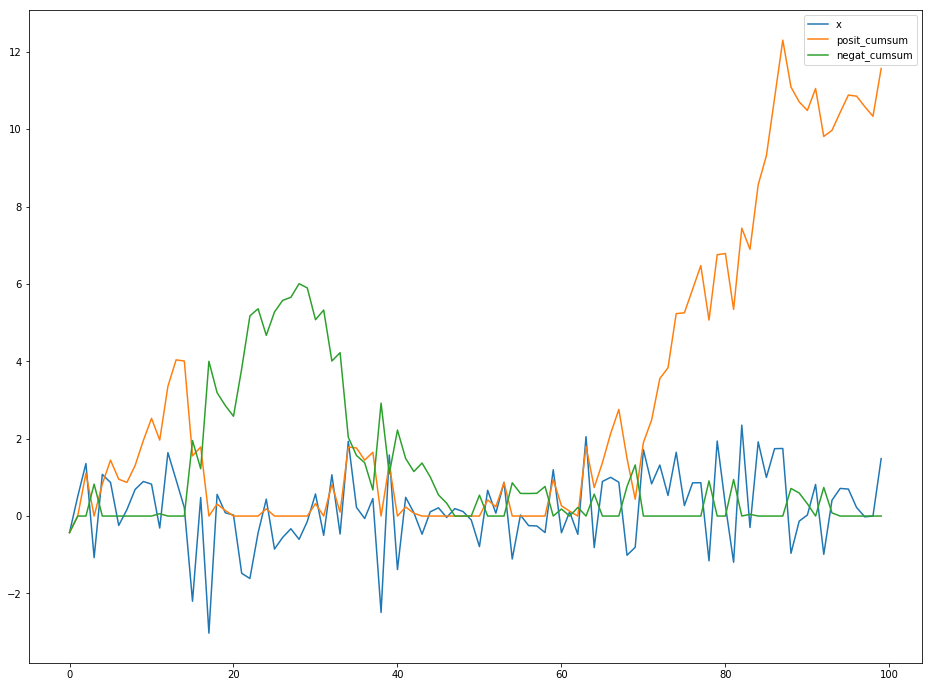

In [20]:
xx = np.random.randn(100)+np.repeat([0,0.5],50)
pd.DataFrame(cumsum(xx,m2=0.25)).plot(figsize=(16, 12))

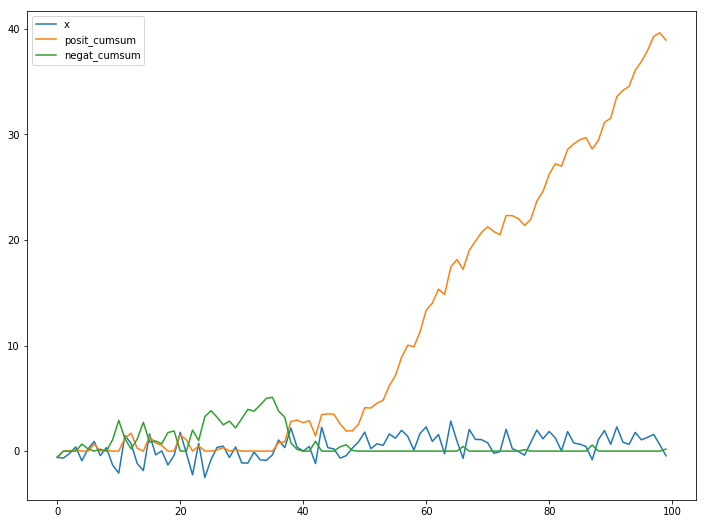

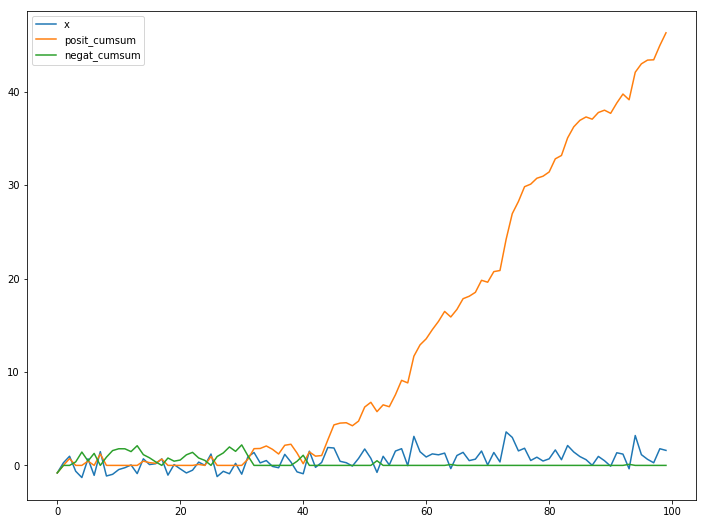

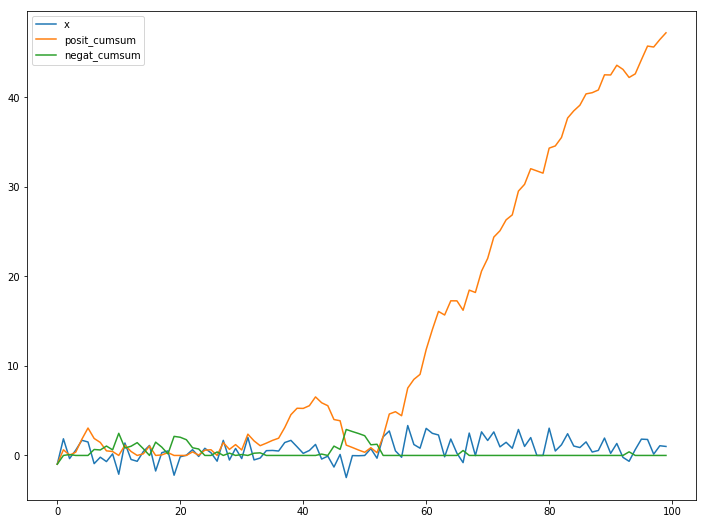

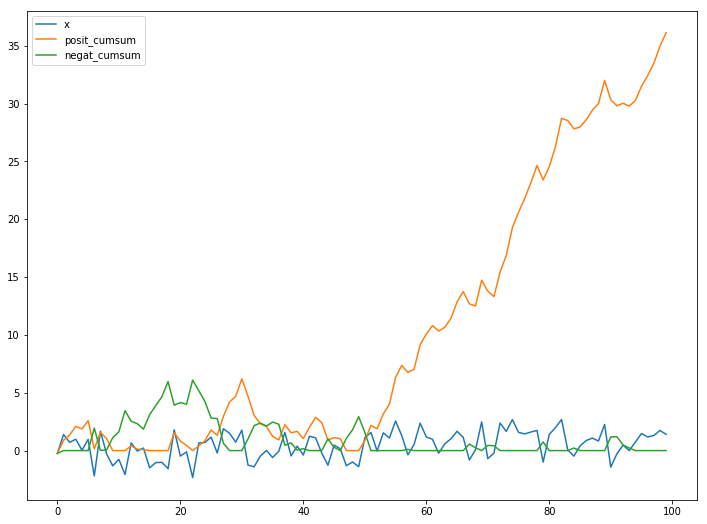

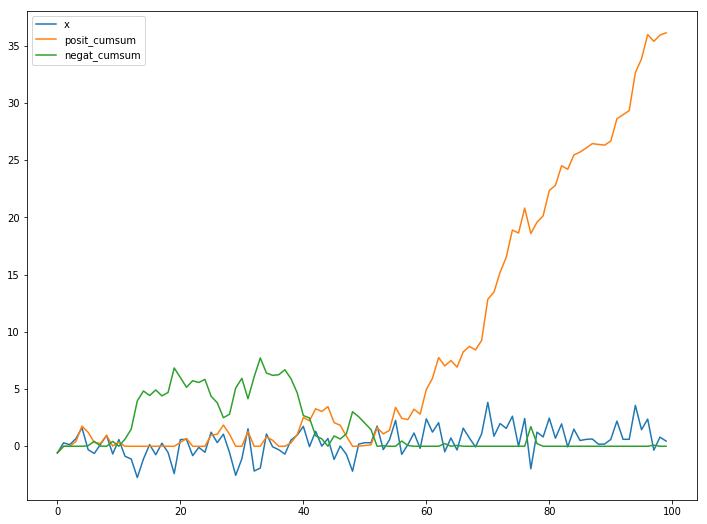

In [22]:
for _ in range(5):
    xx = np.random.randn(100)+np.repeat([0,1],50)
    pd.DataFrame(cumsum(xx,m2=0.25)).plot(figsize=(12, 9))

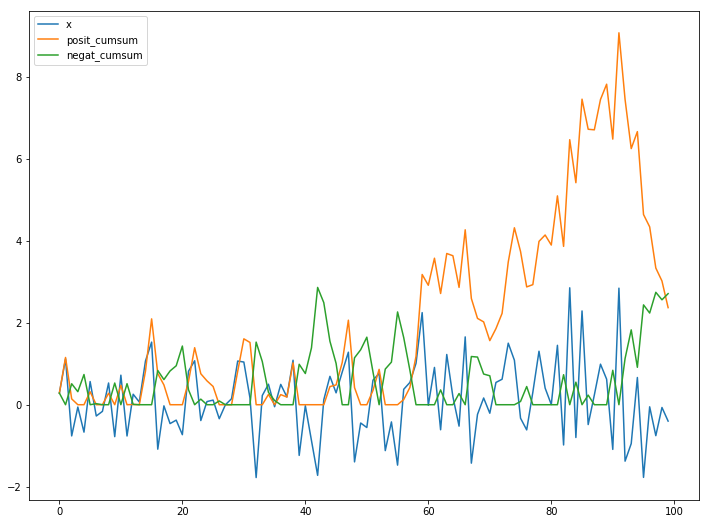

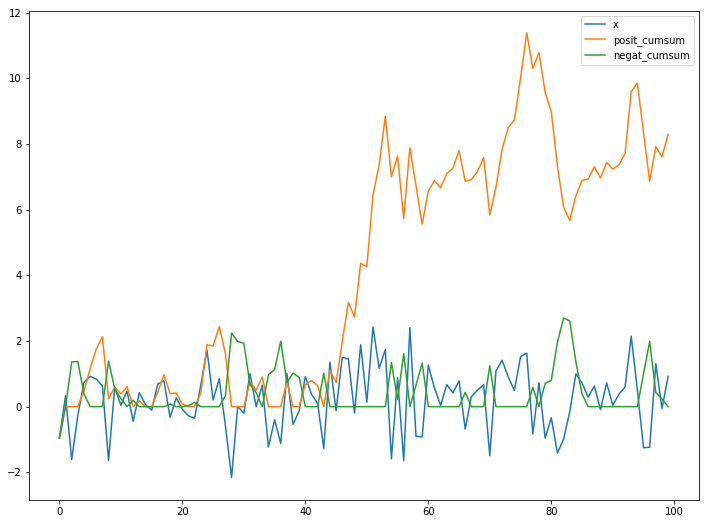

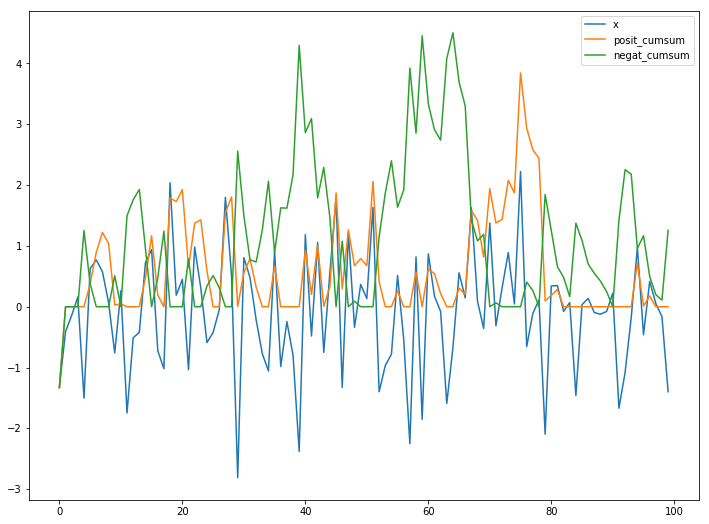

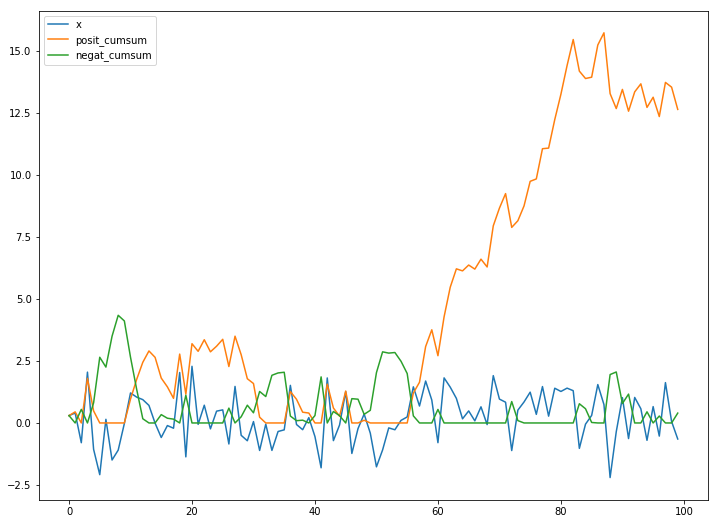

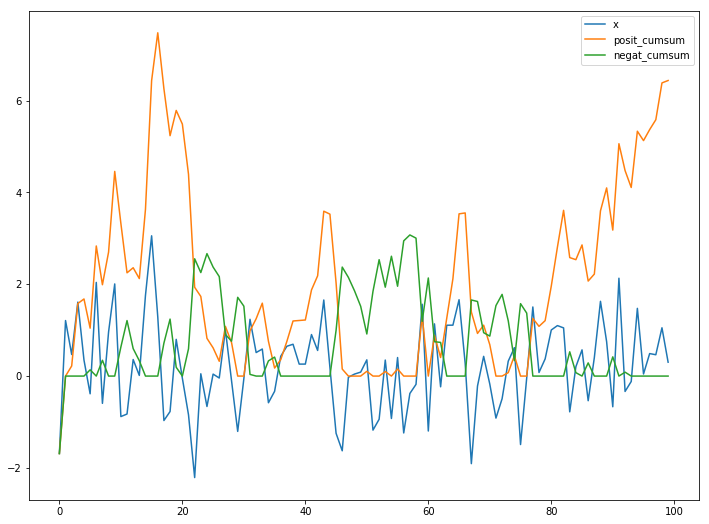

In [25]:
for _ in range(5):
    xx = np.random.randn(100)+np.repeat([0,0.25],50)
    pd.DataFrame(cumsum(xx,m2=0.25)).plot(figsize=(12, 9))